# Neural Network Assignment

Question 1. What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.
  - Deep Learning is a part of machine learning that uses layers of “neurons” to learn from data. Each layer learns simple patterns and later layers combine them into complex patterns.
  Evolution:
  1958: Perceptron introduced.
  1986: Backpropagation made training multi-layer possible.
  After 2010: GPUs, big data, and new tricks (ReLU, dropout, batch norm) made deep learning very powerful.
  Difference from traditional ML:
  Traditional ML needs hand-crafted features. Deep Learning learns features itself.
  Deep Learning is best for images, text, and speech.
  Needs more data and compute but gives higher accuracy.
  Models are often less interpretable but very strong.

Question 2. Explain the basic architecture and functioning of a Perceptron. What are its limitations?
  - A perceptron is the simplest type of neural network. It has:
  Inputs (x1, x2, …, xn)
  Weights (w1, w2, …, wn) that decide importance of each input
  Summation unit which adds up weighted inputs
  Activation function that decides the output (0 or 1 in simple cases).
  Working:
  Multiply each input with its weight.
  Add them together with a bias term.
  Pass the result through activation function.
  Get the output (decision).
  Limitations:
  Can only solve problems that are linearly separable (like AND, OR).
  Cannot solve XOR problem.
  Very simple, so it cannot learn complex patterns.

Question 3. Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.
  - The activation function helps the network learn non-linear patterns. Without it, the network would just act like a simple linear equation.
  Sigmoid:
  Formula: 1 / (1 + e^-x)
  Output between 0 and 1.
  Good for probabilities.
  Problem: can cause slow learning (vanishing gradient).  
  RLU(Rectified linear unit):
  Formula: max(0, x)
  Very simple and fast.
  Helps in deep networks.
  Problem: some neurons may die (always give 0).
  Tanh (Hyperbolic Tangent):
  Formula: (e^x - e^-x) / (e^x + e^-x)
  Output between -1 and 1.
  Better than sigmoid because it is zero-centered.
  Still has vanishing gradient problem for large values.

Question 4. What is the difference between Loss function and Cost function in neural networks? Provide examples.
  - Loss Function:
  It measures the error for a single training example.
  Example: Mean Squared Error (MSE) for one data point.
  Cost Function:
  It is the average of all loss values for the whole training dataset.Example: Average of cross-entropy loss over all training samples.
  Simple Difference:
  Loss → error for one sample.
  Cost → average error for all samples.

Question 5. What is the role of optimizers in neural networks? Compare Gradient Descent, Adam, and RMSprop.
  - Optimizers change the weights of the network to reduce error (cost). They guide how the network learns.
  Gradient Descent:
  Moves weights step by step in the direction of minimum error.
  Simple but can be slow.  
  Adam (Adaptive Moment Estimation):
  Combines momentum + adaptive learning rate.
  Works well in practice, faster and more stable.
  RMSprop:
  Adjusts learning rate for each parameter.
  Good for non-stationary problems (like time series).
  Summary:
  Gradient Descent = basic.
  Adam = fast and most used.
  RMSprop = good for changing data patterns.  

In [1]:
# Q6. Write a Python program to implement a single-layer perceptron from scratch using NumPy to solve the logical AND gate.

import numpy as np

# Inputs and labels for AND gate
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])

# Initialize weights and bias
w = np.random.rand(2)
b = np.random.rand(1)
lr = 0.1   # learning rate
epochs = 20

# Training
for epoch in range(epochs):
    for i in range(len(X)):
        z = np.dot(X[i], w) + b
        pred = 1 if z > 0.5 else 0
        error = y[i] - pred
        w += lr * error * X[i]
        b += lr * error

print("Trained weights:", w)
print("Trained bias:", b)

# Testing
for i in range(len(X)):
    z = np.dot(X[i], w) + b
    pred = 1 if z > 0.5 else 0
    print(f"Input: {X[i]} -> Output: {pred}")

Trained weights: [0.47150896 0.12378753]
Trained bias: [-0.05997572]
Input: [0 0] -> Output: 0
Input: [0 1] -> Output: 0
Input: [1 0] -> Output: 0
Input: [1 1] -> Output: 1


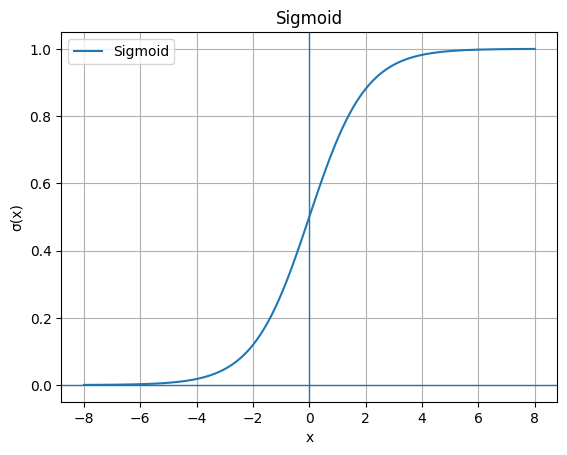

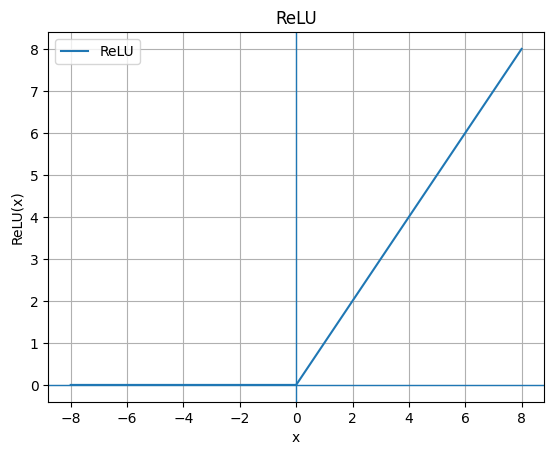

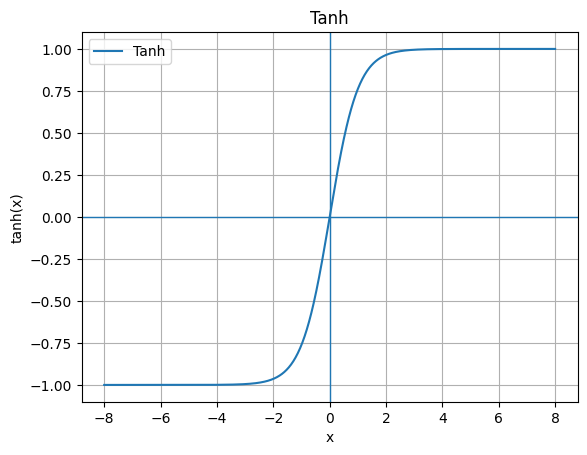

In [2]:
# Q7. Implement and visualize Sigmoid, ReLU, and Tanh activation functions using Matplotlib.

import numpy as np
import matplotlib.pyplot as plt

# x range
x = np.linspace(-8, 8, 1000)

# activation functions
def sigmoid(x):
    return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# --- Sigmoid ---
plt.figure()
plt.plot(x, sigmoid(x), label="Sigmoid")
plt.axhline(0, linewidth=1)
plt.axvline(0, linewidth=1)
plt.title("Sigmoid")
plt.xlabel("x")
plt.ylabel("σ(x)")
plt.grid(True)
plt.legend()
plt.show()

# --- ReLU ---
plt.figure()
plt.plot(x, relu(x), label="ReLU")
plt.axhline(0, linewidth=1)
plt.axvline(0, linewidth=1)
plt.title("ReLU")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.grid(True)
plt.legend()
plt.show()

# --- Tanh ---
plt.figure()
plt.plot(x, tanh(x), label="Tanh")
plt.axhline(0, linewidth=1)
plt.axvline(0, linewidth=1)
plt.title("Tanh")
plt.xlabel("x")
plt.ylabel("tanh(x)")
plt.grid(True)
plt.legend()
plt.show()


In [3]:
# Q8. Use Keras to build and train a simple multilayer neural network on the MNIST digits dataset. Print the training accuracy.

# Setup: Keras MNIST MLP and print training accuracy

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential

# 1) Reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# 2) Load MNIST (28x28 grayscale handwritten digits)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# 3) Scale to [0,1] and flatten (28*28 = 784)
x_train = (x_train.astype("float32") / 255.0).reshape(-1, 784)
x_test  = (x_test.astype("float32")  / 255.0).reshape(-1, 784)

# 4) Build a simple MLP
model = Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# 5) Compile
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# 6) Train (keep it quick)
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

# 7) Print final training accuracy
final_train_acc = history.history["accuracy"][-1]
print(f"Final training accuracy: {final_train_acc:.4f}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8521 - loss: 0.5157 - val_accuracy: 0.9663 - val_loss: 0.1124
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9630 - loss: 0.1243 - val_accuracy: 0.9737 - val_loss: 0.0839
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9775 - loss: 0.0769 - val_accuracy: 0.9788 - val_loss: 0.0735
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9848 - loss: 0.0523 - val_accuracy: 0.9792 - val_loss: 0.0712
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9899 - loss: 0.0359 - val_accuracy: 0.9780 - val_loss: 0.0753
Final training accuracy: 0.9901


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7569 - loss: 0.7051 - val_accuracy: 0.8542 - val_loss: 0.4042
Epoch 2/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8607 - loss: 0.3905 - val_accuracy: 0.8665 - val_loss: 0.3684
Epoch 3/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8725 - loss: 0.3448 - val_accuracy: 0.8700 - val_loss: 0.3651
Epoch 4/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8838 - loss: 0.3142 - val_accuracy: 0.8720 - val_loss: 0.3558
Epoch 5/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8931 - loss: 0.2912 - val_accuracy: 0.8743 - val_loss: 0.3508
Epoch 6/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8994 - loss: 0.2724 - val_accuracy: 0.8698 - val_loss: 0.3611
Epoch 7/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step

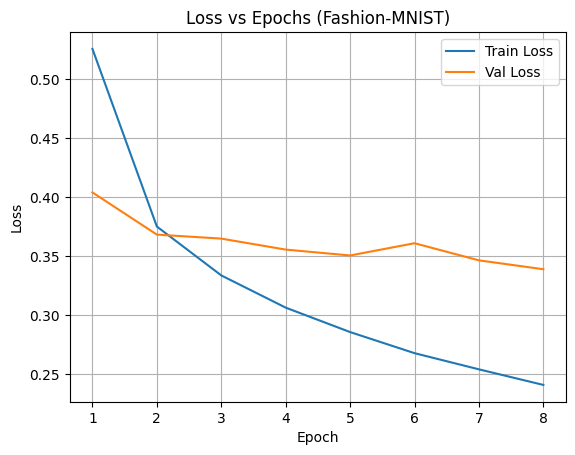

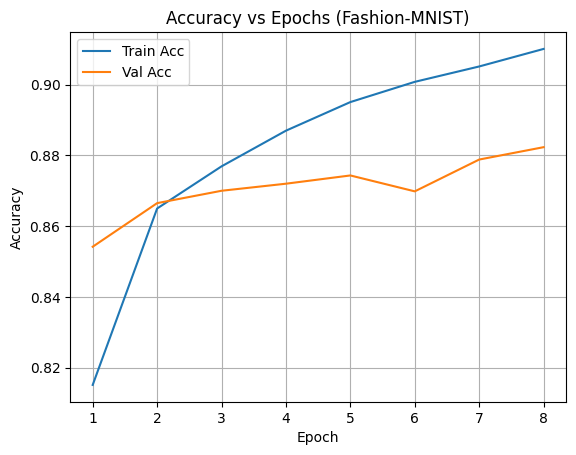

In [4]:
# Q9. Visualize the loss and accuracy curves for a neural network model trained on the Fashion MNIST dataset. Interpret the training behavior.

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
import matplotlib.pyplot as plt

# 1) Load Fashion-MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# 2) Scale to [0,1] and flatten to vectors
x_train = (x_train.astype("float32") / 255.0).reshape(-1, 784)
x_test  = (x_test.astype("float32")  / 255.0).reshape(-1, 784)

# 3) Build a small MLP
model = Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# 4) Compile
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# 5) Train and collect history
history = model.fit(
    x_train, y_train,
    epochs=8,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

# 6) Plot Loss curve
epochs = range(1, len(history.history["loss"]) + 1)

plt.figure()
plt.plot(epochs, history.history["loss"], label="Train Loss")
plt.plot(epochs, history.history["val_loss"], label="Val Loss")
plt.title("Loss vs Epochs (Fashion-MNIST)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

# 7) Plot Accuracy curve
plt.figure()
plt.plot(epochs, history.history["accuracy"], label="Train Acc")
plt.plot(epochs, history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy vs Epochs (Fashion-MNIST)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

Question 10. Bank Fraud Detection — Real-time workflow
  Design (very simple words)
  Data: Many rows with numbers like amount, merchant id, location. Very few are fraud.
  Model: A small multilayer neural network (dense layers). ReLU in hidden layers, sigmoid at the end (gives fraud probability 0–1).
  Loss: Binary Cross-Entropy (good for yes/no fraud).
  Class Imbalance: Use class weights so fraud mistakes get higher penalty.
  Optimizer: Adam (stable and fast).
  Overfitting control: Dropout, L2, EarlyStopping.
  Train/Eval: Split data → train with class weights → watch val AUC/accuracy → pick best epoch → check precision/recall on test.
  Real-time use: For each new transaction, get probability p. If p > threshold (e.g., 0.5 or tuned), flag for review.
  Why choices:
  
  Sigmoid + BCE fits binary labels.
  Adam learns well with default settings.
  Class weights handle rare fraud cases.
  Dropout/L2/EarlyStopping stop overfitting.

Class weights: {0: np.float64(0.5104273005687618), 1: np.float64(24.475524475524477)} | pos fraction in train: 0.020428571428571428
Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6359 - auc: 0.8110 - loss: 0.5597 - val_accuracy: 0.8571 - val_auc: 0.9482 - val_loss: 0.3563
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8499 - auc: 0.9390 - loss: 0.3303 - val_accuracy: 0.8752 - val_auc: 0.9530 - val_loss: 0.2902
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8630 - auc: 0.9448 - loss: 0.3082 - val_accuracy: 0.8796 - val_auc: 0.9545 - val_loss: 0.2764
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8704 - auc: 0.9463 - loss: 0.3035 - val_accuracy: 0.8819 - val_auc: 0.9569 - val_loss: 0.2728
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8692 - auc: 0.9485 - loss: 0.2980 - val_accuracy: 0.8877 - val_auc: 0.9585 - val_loss: 0.2575
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8785 - auc: 0

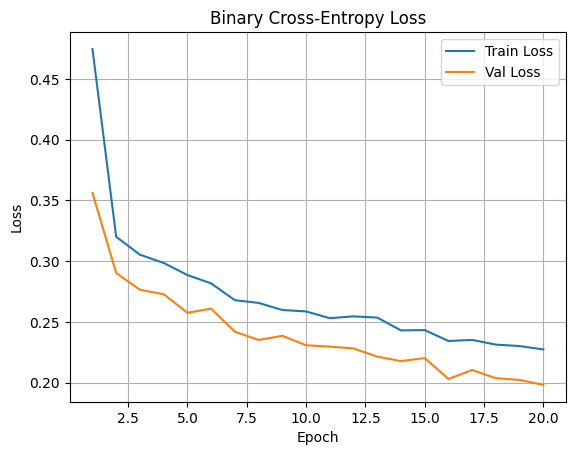

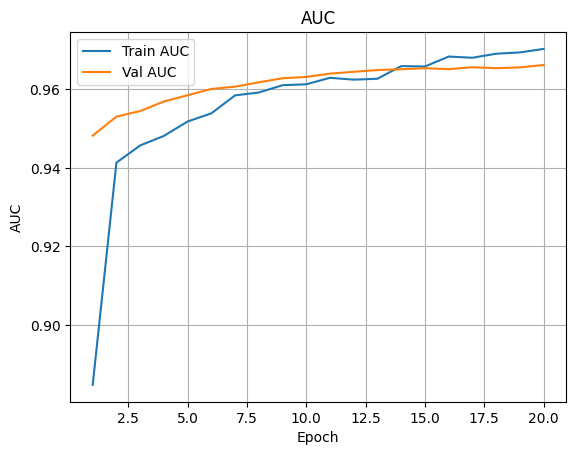

In [5]:
# Answer 10.

# Self-contained demo without external libs (only NumPy, Matplotlib, TensorFlow/Keras).
# We synthesize an imbalanced dataset and train a simple MLP.

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# 1) Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# 2) Create synthetic, imbalanced data (fraud ≈ 2%)
# Features: amount, merchant_id_enc, customer_loc_enc, time_of_day, velocity, etc. (just simulated numbers)
n_samples = 60000
n_features = 12
fraud_rate = 0.02
n_fraud = int(n_samples * fraud_rate)
n_legit = n_samples - n_fraud

# Legit distribution
X_legit = np.random.normal(loc=0.0, scale=1.0, size=(n_legit, n_features))
# Fraud distribution (slightly shifted/scaled to make learnable)
X_fraud = np.random.normal(loc=0.8, scale=1.2, size=(n_fraud, n_features))

X = np.vstack([X_legit, X_fraud]).astype("float32")
y = np.hstack([np.zeros(n_legit, dtype=np.int32), np.ones(n_fraud, dtype=np.int32)])

# Shuffle
idx = np.random.permutation(n_samples)
X, y = X[idx], y[idx]

# 3) Train/Val/Test split: 70/15/15
n_train = int(0.7 * n_samples)
n_val   = int(0.15 * n_samples)
X_train, y_train = X[:n_train], y[:n_train]
X_val,   y_val   = X[n_train:n_train+n_val], y[n_train:n_train+n_val]
X_test,  y_test  = X[n_train+n_val:], y[n_train+n_val:]

# 4) Scale features (simple): standardize using train stats
mu = X_train.mean(axis=0, keepdims=True)
sigma = X_train.std(axis=0, keepdims=True) + 1e-6
X_train = (X_train - mu) / sigma
X_val   = (X_val   - mu) / sigma
X_test  = (X_test  - mu) / sigma

# 5) Class weights (handle imbalance): weight for class = total/(2*count_class)
total = len(y_train)
pos = np.sum(y_train == 1)
neg = np.sum(y_train == 0)
w0 = total / (2.0 * neg)
w1 = total / (2.0 * pos)
class_weight = {0: w0, 1: w1}
print("Class weights:", class_weight, "| pos fraction in train:", pos/total)

# 6) Build model (small MLP with ReLU, dropout, L2)
model = keras.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.2),
    layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")  # probability of fraud
])

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=[keras.metrics.AUC(name="auc"), "accuracy"]
)

# 7) Callbacks (early stopping + best weights)
es = keras.callbacks.EarlyStopping(
    monitor="val_auc", mode="max", patience=3, restore_best_weights=True
)

# 8) Train
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val, y_val),
    class_weight=class_weight,
    callbacks=[es],
    verbose=1
)

# 9) Evaluate on test
test_metrics = model.evaluate(X_test, y_test, verbose=0)
print({"test_loss": test_metrics[0], "test_auc": test_metrics[1], "test_acc": test_metrics[2]})

# 10) Thresholding and simple precision/recall
y_prob = model.predict(X_test, batch_size=1024, verbose=0).ravel()
thr = 0.5  # could tune using PR curve
y_pred = (y_prob >= thr).astype(np.int32)

tp = np.sum((y_pred == 1) & (y_test == 1))
fp = np.sum((y_pred == 1) & (y_test == 0))
tn = np.sum((y_pred == 0) & (y_test == 0))
fn = np.sum((y_pred == 0) & (y_test == 1))
precision = tp / (tp + fp + 1e-9)
recall = tp / (tp + fn + 1e-9)
print(f"Threshold={thr:.2f} | Precision={precision:.4f} | Recall={recall:.4f} | TP={tp} FP={fp} TN={tn} FN={fn}")

# 11) Plot curves
epochs = range(1, len(history.history["loss"]) + 1)

plt.figure()
plt.plot(epochs, history.history["loss"], label="Train Loss")
plt.plot(epochs, history.history["val_loss"], label="Val Loss")
plt.title("Binary Cross-Entropy Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, history.history["auc"], label="Train AUC")
plt.plot(epochs, history.history["val_auc"], label="Val AUC")
plt.title("AUC")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.grid(True)
plt.legend()
plt.show()